<a href="https://colab.research.google.com/github/miguel121610/Firmas/blob/main/Sign2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

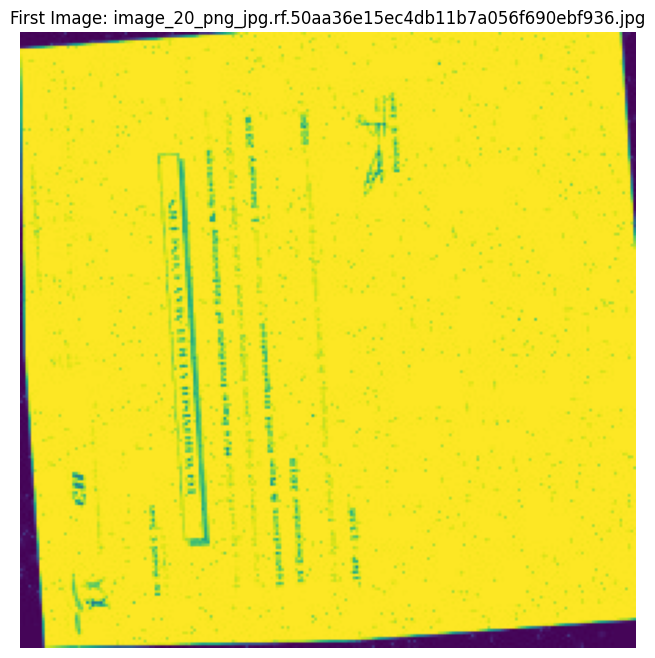

Displayed image: image_20_png_jpg.rf.50aa36e15ec4db11b7a056f690ebf936.jpg


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt


# Define la ruta al directorio de imágenes
train_image_path = r"/content/drive/MyDrive/Dataset/train/images"

# Obtiene  de archivos de imagen
image_files = [f for f in os.listdir(train_image_path) if f.endswith(('.jpg', '.jpeg', '.png'))]


#Comprueba si hay imágenes
if not image_files:
    raise FileNotFoundError(f"No images found in {train_image_path}")


# Seleccione la primera imagen
first_image = image_files[0]
image_path = os.path.join(train_image_path, first_image)


# Cargar y mostrar la imagen
image = Image.open(image_path)
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title(f"First Image: {first_image}")
plt.show()

print(f"Displayed image: {first_image}")

In [ ]:
import yaml
from ultralytics import YOLO

# Definir rutas
train_path = r"/content/drive/MyDrive/Dataset/train"
val_path = r"/content/drive/MyDrive/Dataset/valid"
data_yaml_path = r"/content/drive/MyDrive/Dataset/data.yaml"

# Cargar y verificar data.yaml
with open(data_yaml_path, 'r') as file:
    data = yaml.safe_load(file)


# Cargar o inicializar el modelo YOLOv8
model = YOLO('yolov8m.pt')  # Utilizando el modelo medio (YOLOV8m) para una mejor generalización


# Entrena el modelo con configuraciones mejoradas
print("Starting model training...")
model.train(
    data=data_yaml_path,
    imgsz=640,
    epochs=50,  # Épocas aumentadas para un mejor aprendizaje
    batch=16,
    name='signature_detection_train_improved',
    augment=True,  # Habilitar el aumento de datos
    lr0=0.01,  # Tasa de aprendizaje
    weight_decay=0.0005,  #  para evitar el sobreajuste
    val=True  # Validar durante el entrenamiento
)
print("Entrenamiento modelo completado.")

Starting model training...
Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=signature_detection_train_improved, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=Tru

train: Scanning /content/drive/MyDrive/Dataset/train/labels.cache... 1958 images, 179 backgrounds, 0 corrupt: 100%|██████████| 1958/1958 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 3.7±5.2 ms, read: 3.2±2.3 MB/s, size: 11.8 KB)


val: Scanning /content/drive/MyDrive/Dataset/valid/labels.cache... 370 images, 38 backgrounds, 0 corrupt: 100%|██████████| 370/370 [00:00<?, ?it/s]


Plotting labels to runs/detect/signature_detection_train_improved/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/signature_detection_train_improved
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.23G      2.615      3.435      2.232         10        640: 100%|██████████| 123/123 [01:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.18it/s]

                   all        370        398     0.0142      0.271    0.00952    0.00333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.37G      2.815      3.417      2.425          8        640: 100%|██████████| 123/123 [01:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        370        398      0.083      0.118     0.0296    0.00672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.41G      2.751      3.345      2.389          7        640: 100%|██████████| 123/123 [01:04<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.81it/s]

                   all        370        398          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.38G      2.693      3.266      2.381         16        640: 100%|██████████| 123/123 [01:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        370        398          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.39G      2.597      3.138      2.328         11        640: 100%|██████████| 123/123 [01:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]

                   all        370        398          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.35G      2.484      3.018      2.235         12        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.04it/s]

                   all        370        398      0.309      0.328       0.25     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.38G       2.45      2.959      2.215          9        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]

                   all        370        398      0.449       0.45      0.415      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.39G      2.445      2.844      2.211          8        640: 100%|██████████| 123/123 [01:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.75it/s]

                   all        370        398          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       6.4G      2.333      2.756      2.117         11        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.49it/s]

                   all        370        398      0.364      0.216      0.169     0.0463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.35G      2.335      2.694      2.109          9        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]

                   all        370        398      0.387      0.425      0.328      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.38G      2.292       2.63      2.079         11        640: 100%|██████████| 123/123 [01:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]

                   all        370        398      0.367      0.374      0.281       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       6.4G      2.266      2.579      2.066          5        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.64it/s]

                   all        370        398    0.00619     0.0176    0.00341    0.00102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       6.4G       2.28        2.6       2.07         18        640: 100%|██████████| 123/123 [01:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.69it/s]

                   all        370        398      0.182     0.0151     0.0928     0.0354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.34G      2.238      2.536      2.056         13        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.42it/s]

                   all        370        398      0.023      0.136     0.0137    0.00478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.38G      2.257      2.544      2.027          9        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        370        398      0.632      0.543      0.609      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.39G      2.194       2.42      2.014          4        640: 100%|██████████| 123/123 [01:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.47it/s]

                   all        370        398      0.421      0.136      0.165     0.0643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.41G       2.17      2.443      2.016          9        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.34it/s]

                   all        370        398     0.0881      0.319     0.0889      0.023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.36G      2.195      2.453      2.019         16        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.18it/s]

                   all        370        398      0.429      0.314      0.292      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       6.4G      2.158      2.403      2.012         11        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.20it/s]

                   all        370        398      0.191      0.181      0.121     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.41G      2.138      2.357      1.971         13        640: 100%|██████████| 123/123 [01:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]

                   all        370        398      0.531      0.371      0.409      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.39G       2.12       2.35      1.956         11        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.42it/s]

                   all        370        398      0.103     0.0729     0.0627      0.024



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       6.3G      2.142      2.397      1.994         11        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.15it/s]

                   all        370        398      0.667      0.548      0.637      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.42G      2.114      2.336      1.957         11        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.20it/s]

                   all        370        398      0.446      0.228      0.244      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.39G      2.089      2.314      1.947         11        640: 100%|██████████| 123/123 [01:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.10it/s]

                   all        370        398      0.682      0.588      0.627      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.39G      2.123      2.356      1.973          7        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]

                   all        370        398      0.379      0.143      0.159     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.36G      2.093        2.3      1.938          9        640: 100%|██████████| 123/123 [01:03<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]

                   all        370        398      0.718      0.666      0.717      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       6.4G        2.1      2.301       1.94         13        640: 100%|██████████| 123/123 [01:03<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]

                   all        370        398      0.709      0.595      0.647      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.39G      2.082      2.257      1.939         13        640: 100%|██████████| 123/123 [01:03<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.18it/s]

                   all        370        398      0.728      0.572      0.642      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       6.4G      2.068      2.202      1.924          8        640: 100%|██████████| 123/123 [01:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]

                   all        370        398       0.71      0.572      0.647      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       6.3G      2.066      2.199      1.916         21        640: 100%|██████████| 123/123 [01:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.17it/s]

                   all        370        398      0.812      0.641      0.726      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.39G      2.025       2.21      1.892         10        640: 100%|██████████| 123/123 [01:03<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.10it/s]

                   all        370        398      0.781      0.671      0.738      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.38G      2.057       2.25      1.904         13        640: 100%|██████████| 123/123 [01:04<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]

                   all        370        398      0.696      0.595       0.64      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.42G      2.019      2.189      1.889         17        640: 100%|██████████| 123/123 [01:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.19it/s]

                   all        370        398      0.766      0.621      0.706      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.34G      2.004      2.111      1.871         22        640: 100%|██████████| 123/123 [01:03<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.05it/s]

                   all        370        398      0.707      0.638       0.68      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.39G      2.007      2.149      1.869         13        640: 100%|██████████| 123/123 [01:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.16it/s]

                   all        370        398      0.773      0.628       0.71      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.38G      1.938      2.071       1.83         12        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.14it/s]

                   all        370        398      0.642       0.48      0.503      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.41G      1.983      2.139      1.853         12        640: 100%|██████████| 123/123 [01:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.40it/s]

                   all        370        398       0.75      0.641       0.68       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.35G      1.969      2.097      1.838          8        640: 100%|██████████| 123/123 [01:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.27it/s]

                   all        370        398      0.752      0.661      0.721      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.39G      1.957      2.094      1.835         13        640: 100%|██████████| 123/123 [01:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.17it/s]

                   all        370        398      0.758      0.696      0.733      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.43G      1.956      2.085      1.846         11        640: 100%|██████████| 123/123 [01:04<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        370        398      0.848      0.673      0.765      0.395


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       6.4G      1.949      2.057      1.929          6        640: 100%|██████████| 123/123 [01:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.40it/s]

                   all        370        398       0.83      0.683      0.763      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.34G        1.9      1.965      1.877          5        640: 100%|██████████| 123/123 [01:03<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.40it/s]

                   all        370        398      0.777      0.613      0.704      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.39G      1.905      1.986       1.91          7        640: 100%|██████████| 123/123 [01:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.37it/s]

                   all        370        398      0.835      0.684       0.77      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.39G      1.874      1.935      1.878          7        640: 100%|██████████| 123/123 [01:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]

                   all        370        398      0.788      0.609      0.694      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.42G      1.863      1.904      1.873          8        640: 100%|██████████| 123/123 [01:03<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.21it/s]

                   all        370        398      0.807      0.672      0.732      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.35G      1.856      1.876       1.86          8        640: 100%|██████████| 123/123 [01:03<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        370        398      0.828      0.751      0.807      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.41G       1.85      1.865      1.857          7        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]

                   all        370        398      0.785      0.707      0.761      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.39G      1.831      1.857      1.862          8        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]

                   all        370        398      0.823      0.746      0.796      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       6.4G      1.806      1.825      1.828          8        640: 100%|██████████| 123/123 [01:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]

                   all        370        398      0.814      0.747       0.79      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.34G      1.835       1.84      1.838          4        640: 100%|██████████| 123/123 [01:03<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]

                   all        370        398      0.841      0.736      0.792      0.423



50 epochs completed in 0.988 hours.
Optimizer stripped from runs/detect/signature_detection_train_improved/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/signature_detection_train_improved/weights/best.pt, 52.0MB

Validating runs/detect/signature_detection_train_improved/weights/best.pt...
Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.02it/s]


                   all        370        398      0.805      0.746       0.81      0.448
Speed: 0.3ms preprocess, 24.7ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/signature_detection_train_improved
Model training completed.


In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
import os

# Cargar el modelo entrenado
model = YOLO('runs/detect/signature_detection_train_improved/weights/best.pt')

# Función para extraer todos los patrones de firma y guardar la imagen anotada
def extract_signature_patterns(image_path, model, conf_threshold=0.2):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: No se pudo cargar la imagen en {image_path}")
        return None, None

    # Predecir y guardar imágenes anotadas
    results = model.predict(image_path, conf=conf_threshold, save=True, save_txt=False, save_conf=True)
    output_dir = 'runs/detect/predict'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    annotated_path = os.path.join(output_dir, os.path.basename(image_path))

    patterns = []
    for result in results:
        boxes = result.boxes
        if len(boxes) > 0:
            for box in boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                signature_crop = img[y1:y2, x1:x2]
                # Cambiar el tamaño y convertir a escala de grises
                signature_crop = cv2.resize(signature_crop, (224, 224))
                signature_gray = cv2.cvtColor(signature_crop, cv2.COLOR_BGR2GRAY)
                # Detección de bordes para análisis de patrones
                edges = cv2.Canny(signature_gray, 100, 200)
                # encontrar contornos
                contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                if contours:
                    patterns.append((signature_crop, contours))
    if not patterns:
        print(f"No se detectaron patrones de firma en {image_path}")
    return patterns, annotated_path

# Función para comparar patrones de firma
def compare_signature_patterns(patterns1, patterns2):
    if not patterns1 or not patterns2:
        print("Comparison failed: One or both images do not contain detectable signature patterns.")
        return False

    # Compara cada patrón de la imagen 1 con cada patrón de la imagen 2
    for crop1, contours1 in patterns1:
        for crop2, contours2 in patterns2:
            # Calcular la similitud del contorno usando matchShapes
            if contours1 and contours2:
                similarity = cv2.matchShapes(contours1[0], contours2[0], cv2.CONTOURS_MATCH_I3, 0.0)
                print(f"Pattern similarity score: {similarity:.4f}")
                # Umbral para considerar patrones similares (valor más bajo = más similar)
                if similarity < 0.1:  # Ajuste el umbral según sea necesario
                    return True
    return False

# Función principal para ejecutar la comparación
def main():
    # Obtener rutas de imagen de la usuaria
    image1_path = input("Introduzca la ruta a la primera imagen: ")
    image2_path = input("Introduzca la ruta a la segunda imagen: ")

    if not os.path.exists(image1_path):
        print(f"Error: Imagen en {image1_path} no existe.")
        return
    if not os.path.exists(image2_path):
        print(f"Error: Imagen en {image2_path} no existe.")
        return

    # Extract patterns from both images
    patterns1, _ = extract_signature_patterns(image1_path, model)
    patterns2, _ = extract_signature_patterns(image2_path, model)

    # Compare the signature patterns
    are_similar = compare_signature_patterns(patterns1, patterns2)
    if are_similar:
        print("Las firmas en las dos imágenes son las mismas (se detectaron patrones similares)).")
    else:
        print("Las firmas en las dos imágenes no son iguales (no se detectan patrones similares).")

if __name__ == "__main__":
    main()

Enter the path to the first image: /content/ss.jpg
Enter the path to the second image: /content/ss2.jpg

image 1/1 /content/ss.jpg: 640x480 (no detections), 29.2ms
Speed: 3.3ms preprocess, 29.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict10
No signature patterns detected in /content/ss.jpg

image 1/1 /content/ss2.jpg: 640x480 1 signature, 27.7ms
Speed: 3.0ms preprocess, 27.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict10
Comparison failed: One or both images do not contain detectable signature patterns.
The signatures in the two images are not same (no similar patterns detected).


  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/ss2.jpg (deflated 6%)
  adding: content/runs/detect/predict/ss.jpg (deflated 8%)
  adding: content/runs/detect/predict11/ (stored 0%)
  adding: content/runs/detect/predict11/ss2.jpg (deflated 6%)
  adding: content/runs/detect/predict11/ss.jpg (deflated 8%)
  adding: content/runs/detect/predict4/ (stored 0%)
  adding: content/runs/detect/predict4/q2.jpg (deflated 3%)
  adding: content/runs/detect/predict4/q1.jpg (deflated 8%)
  adding: content/runs/detect/predict9/ (stored 0%)
  adding: content/runs/detect/predict9/q1.jpg (deflated 5%)
  adding: content/runs/detect/predict5/ (stored 0%)
  adding: content/runs/detect/predict5/q2.jpg (deflated 3%)
  adding: content/runs/detect/predict5/q1.jpg (deflated 8%)
  adding: content/runs/detect/signature_detection_train/ (stored 0%)
  adding: content/runs/detect/signature_detection_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>